Time-mean surface wind stresses, heat fluxes and fresh water fluxes are analysed in the MOM6-examples focring files.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from xgcm import Grid
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob, os

In [2]:
# Read files
ppdir = "/nbhome/Hemant.Khatri/Baltic_Files/"
ds = xr.open_mfdataset(ppdir + "*_monthly.nc")

print(ds)   

<xarray.Dataset>
Dimensions:      (nv: 2, time: 12, xh: 360, xq: 360, yh: 210, yq: 210)
Coordinates:
  * xh           (xh) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yh           (yh) float64 -76.75 -76.25 -75.75 -75.25 ... 88.75 89.25 89.75
  * time         (time) object 0001-01-16 12:00:00 ... 0001-12-16 12:00:00
  * nv           (nv) float64 1.0 2.0
  * xq           (xq) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yq           (yq) float64 -76.5 -76.0 -75.5 -75.0 ... 88.5 89.0 89.5 90.0
Data variables:
    SW           (time, yh, xh) float32 dask.array<chunksize=(12, 210, 360), meta=np.ndarray>
    LW           (time, yh, xh) float32 dask.array<chunksize=(12, 210, 360), meta=np.ndarray>
    latent       (time, yh, xh) float32 dask.array<chunksize=(12, 210, 360), meta=np.ndarray>
    sensible     (time, yh, xh) float32 dask.array<chunksize=(12, 210, 360), meta=np.ndarray>
    evap         (time, yh, xh) float32 dask.array<chunksize=(12, 210, 360), meta=

In [3]:
ds['evap']

<xarray.DataArray 'evap' (time: 12, yh: 210, xh: 360)>
dask.array<open_dataset-c472acd94e3491a1eee935311255989cevap, shape=(12, 210, 360), dtype=float32, chunksize=(12, 210, 360), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -279.5 -278.5 -277.5 -276.5 ... 76.5 77.5 78.5 79.5
  * yh       (yh) float64 -76.75 -76.25 -75.75 -75.25 ... 88.75 89.25 89.75
  * time     (time) object 0001-01-16 12:00:00 ... 0001-12-16 12:00:00
Attributes:
    long_name:      Evaporation at ocean surface (usually negative)
    units:          kilogram meter-2 second-1
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT

$\Large \text{Time-mean Plots}$ 

First, we plot the time-averaged wind forcing, heat, fresh water fluxes. Then we also look at sea surface temperature and salinity.
These are then used to construct zonally-averaged profiles in Kerguelen plateau region (between lon 30$^o$ and 110$^o$). 


In [4]:
def SOSE_plot_mono(ax, da, vmin=-999, vmax=999, vstep=1,
                        lon='XC', lat='YC', landcolor=1.,
                        cmap='RdBu_r', title='what is it?'):
    """ standard global plot for the Southern Ocean """

    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER 
    
    # contours
    contours = np.arange(vmin, vmax+vstep, vstep)

    cf = da.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                          x=lon, y=lat,
                          levels=contours,
                          vmin=vmin, vmax=vmax,
                          add_labels=False,
                          add_colorbar=False,
                          cmap=cmap)
    # add separate colorbar
    cb = plt.colorbar(cf, ax=ax, format='%.1e', extend='both', shrink=0.9)
    cb.ax.tick_params(labelsize=12)
    #cb.formatter.set_scientific(True)
    #cb.formatter.set_powerlimits((-1, 1))
    
    #fig = plt.figure(figsize=[16,10])
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -75, -28], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')

    # parallels/meridiens
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator([-80, -70, -60, -50, -40, -30])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'black'}
    gl.ylabel_style = {'size': 12, 'color': 'black'}
    
    #ax.set_adjustable('datalim')
    
    
    ax.set_aspect(1.3)

    # title
    _ = plt.title(title, fontsize=16)
    return fig

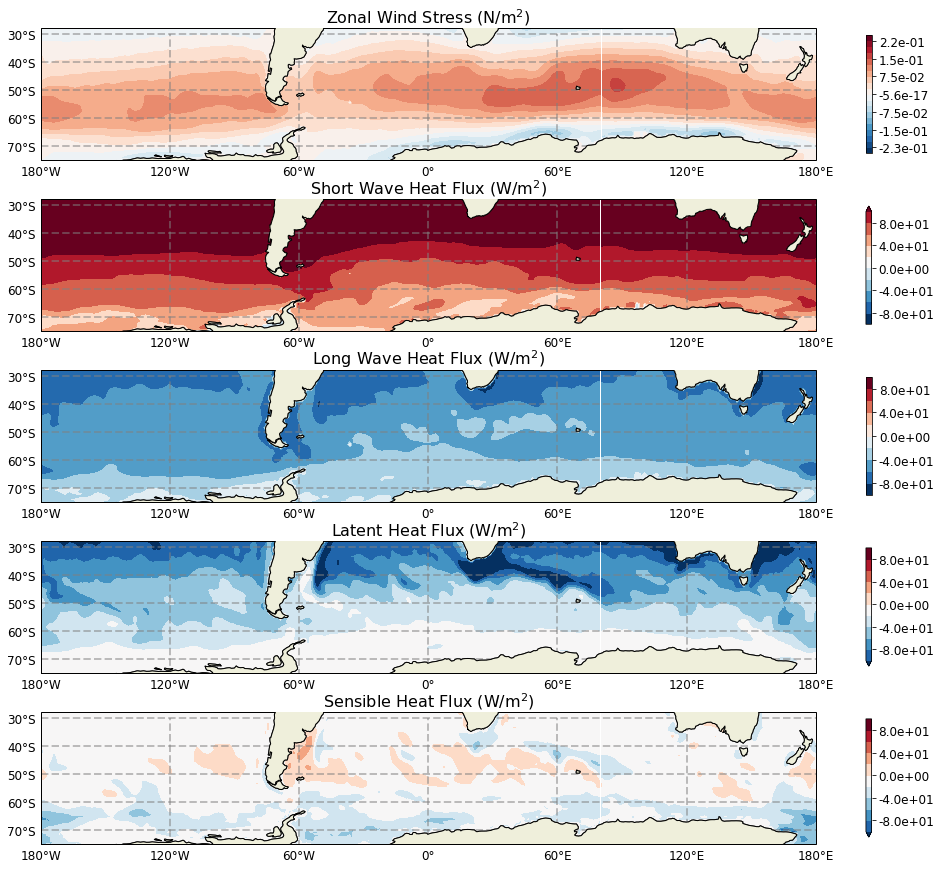

In [9]:
grid = plt.GridSpec(5, 4, wspace=0.4, hspace=0.3)

fig = plt.figure(figsize=[18,15])
ax = fig.add_subplot(grid[0, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['taux'].mean('time'), vmin=-0.25, vmax=0.25, vstep=0.025,
                   lon='xq', lat='yh', landcolor=2., cmap='RdBu_r', title='Zonal Wind Stress (N/m$^2$)')

ax = fig.add_subplot(grid[1, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['SW']).mean('time'), vmin=-100, vmax=100, vstep=20,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Short Wave Heat Flux (W/m$^2$)')

ax = fig.add_subplot(grid[2, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['LW']).mean('time'), vmin=-100, vmax=100, vstep=20,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Long Wave Heat Flux (W/m$^2$)')

ax = fig.add_subplot(grid[3, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['latent']).mean('time'), vmin=-100, vmax=100, vstep=20,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Latent Heat Flux (W/m$^2$)')

ax = fig.add_subplot(grid[4, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, (ds['sensible']).mean('time'), vmin=-100, vmax=100, vstep=20,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Sensible Heat Flux (W/m$^2$)')


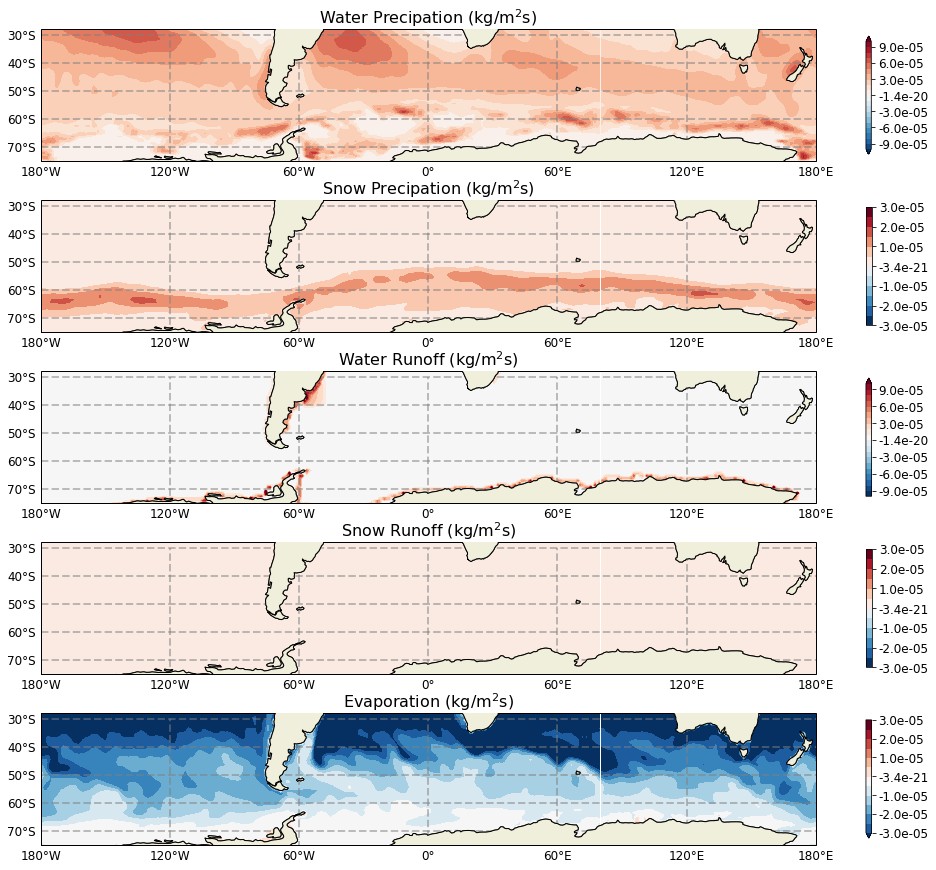

In [10]:
grid = plt.GridSpec(5, 4, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=[18,15])

ax = fig.add_subplot(grid[0, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['liq_precip'].mean('time'), vmin=-1e-4, vmax=1e-4, vstep=1e-5,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Water Precipation (kg/m$^2$s)')

ax = fig.add_subplot(grid[1, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['froz_precip'].mean('time'), vmin=-3e-5, vmax=3e-5, vstep=0.5e-5,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Snow Precipation (kg/m$^2$s)')

ax = fig.add_subplot(grid[2, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['liq_runoff'].mean('time'), vmin=-1e-4, vmax=1e-4, vstep=1e-5,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Water Runoff (kg/m$^2$s)')

ax = fig.add_subplot(grid[3, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['froz_runoff'].mean('time'), vmin=-3e-5, vmax=3e-5, vstep=0.5e-5,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Snow Runoff (kg/m$^2$s)')

ax = fig.add_subplot(grid[4, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['evap'].mean('time'), vmin=-3e-5, vmax=3e-5, vstep=0.5e-5,
                   lon='xh', lat='yh', landcolor=2., cmap='RdBu_r', title='Evaporation (kg/m$^2$s)')

$\Large \text{Zonal-Mean Plots}$

lat bands = (0, 80)

([<matplotlib.axis.XTick at 0x2b159f6af950>,
 <a list of 5 Text xticklabel objects>)

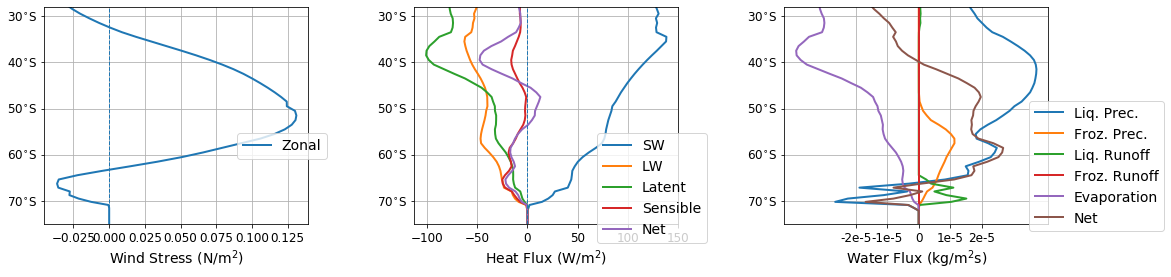

In [22]:
grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=[18,4])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds['taux'].sel(xq = slice(0,80)).mean(['time','xq']),ds['yh'],lw=2, label='Zonal')
ax.set_xlabel('Wind Stress (N/m$^2$)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
ax.axvline(x=0, lw=1, ls='--')
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.9, 0.45), fontsize=14)

ax = fig.add_subplot(grid[0, 1])
ax.plot(ds['SW'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='SW')
ax.plot(ds['LW'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='LW')
ax.plot(ds['latent'].sel(xh = slice(8,80)).mean(['time','xh']),ds['yh'],lw=2, label='Latent')
ax.plot(ds['sensible'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='Sensible')
ax.plot((ds['SW'] + ds['LW']+ ds['latent']+ds['sensible']).sel(xh = slice(0,80)).mean(['time','xh']),
        ds['yh'],lw=2, label='Net')
ax.set_xlabel('Heat Flux (W/m$^2$)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
ax.axvline(x=0, lw=1, ls='--')
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.9, 0.45), fontsize=14)

ax = fig.add_subplot(grid[0, 2])
ax.plot(ds['liq_precip'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='Liq. Prec.')
ax.plot(ds['froz_precip'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='Froz. Prec.')
ax.plot(ds['liq_runoff'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='Liq. Runoff')
ax.plot(ds['froz_runoff'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='Froz. Runoff')
ax.plot(ds['evap'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2, label='Evaporation')
ax.plot((ds['liq_precip']+ds['froz_precip']+ds['liq_runoff']+ds['froz_runoff']+ds['evap']).sel(xh = slice(0,80)).mean(['time','xh']),
        ds['yh'],lw=2, label='Net')
ax.set_xlabel('Water Flux (kg/m$^2$s)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
#ax.axvline(x=0, lw=1, ls='--')
plt.grid()
ax.legend(loc='upper left', bbox_to_anchor=(0.9, 0.6), fontsize=14)
plt.xticks([-2e-5, -1e-5, 0, 1e-5, 2e-5], ['-2e-5', '-1e-5', '0', '1e-5','2e-5'])

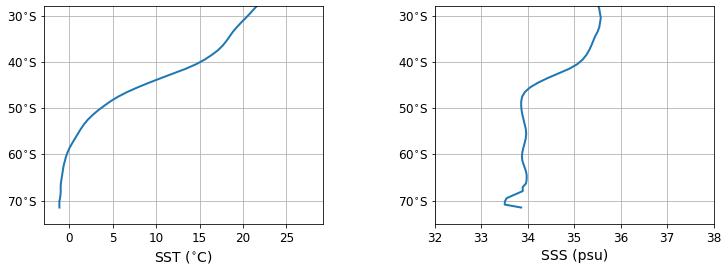

In [25]:
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=[12,4])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds['SST'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2)
ax.set_xlabel('SST ($^{\circ}$C)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[0, 1])
ax.plot(ds['SSS'].sel(xh = slice(0,80)).mean(['time','xh']),ds['yh'],lw=2)
ax.set_xlabel('SSS (psu)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
ax.set_xlim((32.,38.))
plt.xticks(fontsize=12)
plt.grid()

In [5]:
ds.close()

$\Large \text{Vertical T and S profiles from OM4}$

In [6]:
rootdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/OM4p25_JRA55do1.4_0netfw_cycle6/gfdl.ncrc4-intel16-prod/pp/'
pp = 'ocean_annual_z'
localdir = '/av/annual_20yr/'
filename = pp+'.1998-2017.ann.nc'
ds = xr.open_mfdataset(rootdir+pp+localdir+filename)
grid = xr.open_dataset(rootdir+pp+'/'+pp+'.static.nc')

In [7]:
ds = xr.merge([ds, grid])
ds

<xarray.Dataset>
Dimensions:                         (nv: 2, time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, z_i: 36, z_l: 35)
Coordinates:
  * xh                              (xh) float64 -299.7 -299.5 ... 59.78 60.03
  * yh                              (yh) float64 -80.39 -80.31 ... 89.84 89.95
  * z_l                             (z_l) float64 2.5 10.0 ... 6e+03 6.5e+03
  * z_i                             (z_i) float64 0.0 5.0 ... 6.25e+03 6.75e+03
  * time                            (time) object 2008-01-01 12:00:00
  * nv                              (nv) float64 1.0 2.0
  * xq                              (xq) float64 -299.6 -299.3 ... 59.91 60.16
  * yq                              (yq) float64 -80.35 -80.27 ... 89.89 90.0
Data variables:
    volcello                        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 1080, 1440), meta=np.ndarray>
    thetao                          (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 1080, 1440), meta=np.ndarray

In [30]:
def pdens(S,theta):

    # --- Define constants (Table 1 Column 4, Wright 1997, J. Ocean Tech.)---
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    # To compute potential density keep pressure p = 100 kpa
    # S in standard salinity units psu, theta in DegC, p in pascals

    p = 100000.
    alpha0 = a0 + a1*theta + a2*S
    p0 = b0 + b1*theta + b2*theta**2 + b3*theta**3 + b4*S + b5*theta*S
    lambd = c0 + c1*theta + c2*theta**2 + c3*theta**3 + c4*S + c5*theta*S

    pot_dens = (p + p0)/(lambd + alpha0*(p + p0)) - 1000.

    return pot_dens

def salinity_vallis_2006(rho, theta, z):

    # Simpler nonlinear equation of state (Nycander et al., 2015)
    g = 9.8; c = 1500.; 
    rho_0 = 1027.; theta_0 = 10; S_0 = 35.;
    z = 0.
    
    gamma_b = 1.1179*1.e-4; gamma_c = 1.e-5; 
    alpha = 1.67*1.e-4; beta = 0.78*1.e-3 
    
    b = -g * (rho - rho_0)/rho_0
    
    S = -b/g -g*z/c**2 + alpha*(1 + gamma_b * z)*(theta - theta_0) + 0.5 * gamma_c * (theta - theta_0)**2
    
    S = S / beta + S_0
    
    return S
    

In [10]:
sigma2 = xr.apply_ufunc(pdens, ds.so, ds.thetao, dask='parallelized', output_dtypes=[ds.so.dtype])

print(sigma2)

<xarray.DataArray (time: 1, z_l: 35, yh: 1080, xh: 1440)>
dask.array<pdens, shape=(1, 35, 1080, 1440), dtype=float32, chunksize=(1, 35, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time     (time) object 2008-01-01 12:00:00


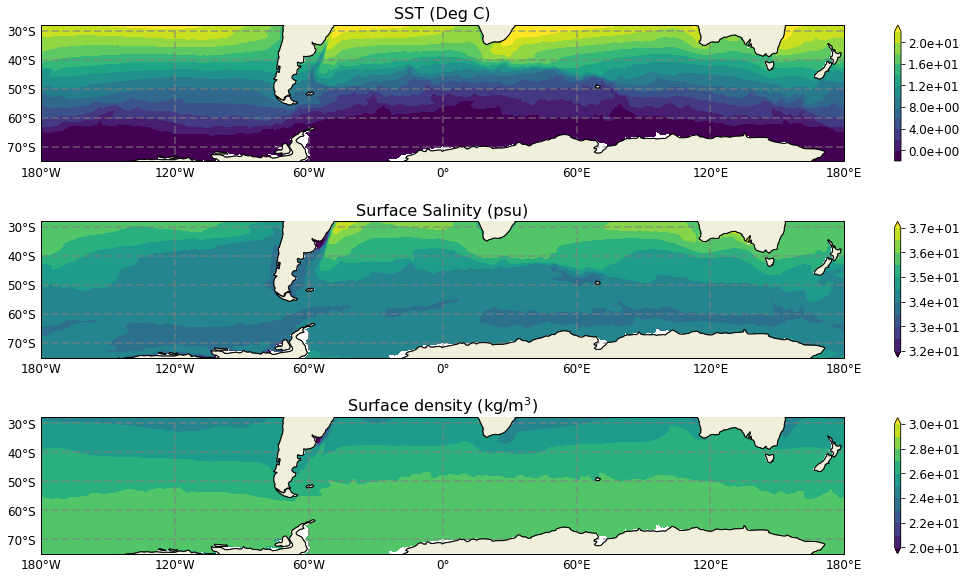

In [11]:
grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

fig = plt.figure(figsize=[18,10])
ax = fig.add_subplot(grid[0, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['thetao'].isel(time=0, z_l=0), vmin=-2., vmax=22., vstep=2.,
                   lon='xh', lat='yh', landcolor=2., cmap='viridis', title='SST (Deg C)')

ax = fig.add_subplot(grid[1, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, ds['so'].isel(time=0, z_l=0), vmin=32., vmax=37., vstep=0.5,
                   lon='xh', lat='yh', landcolor=2., cmap='viridis', title='Surface Salinity (psu)')
                   
ax = fig.add_subplot(grid[2, 0:], projection=ccrs.PlateCarree())
_ = SOSE_plot_mono(ax, sigma2.isel(time=0, z_l=0), vmin=20., vmax=30., vstep=1.,
                   lon='xh', lat='yh', landcolor=2., cmap='viridis', title='Surface density (kg/m$^3$)')

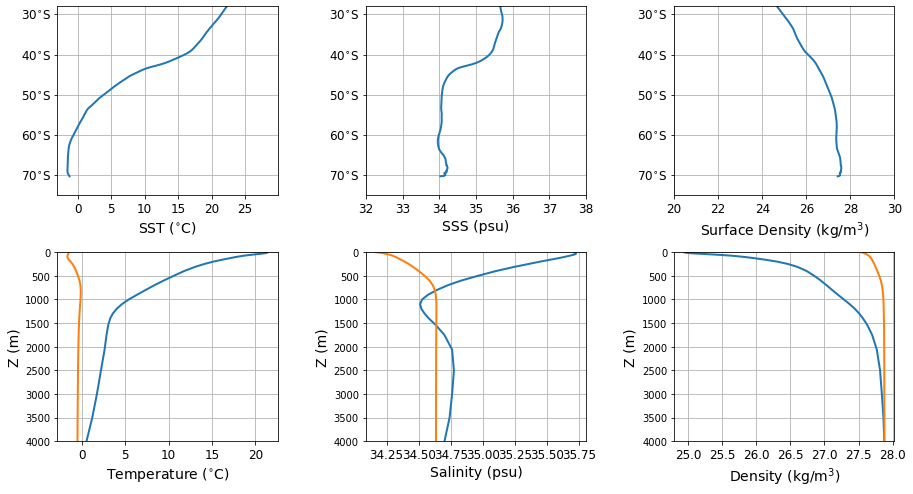

In [12]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=[15,8])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds['thetao'].sel(xh = slice(0,80)).isel(time=0, z_l=0).mean('xh'),ds['yh'],lw=2)
ax.set_xlabel('SST ($^{\circ}$C)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[0, 1])
ax.plot(ds['so'].sel(xh = slice(0,80)).isel(time=0, z_l=0).mean('xh'),ds['yh'],lw=2)
ax.set_xlabel('SSS (psu)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
ax.set_xlim((32.,38.))
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[0, 2])
ax.plot(sigma2.sel(xh = slice(0,80)).isel(time=0, z_l=0).mean('xh'),ds['yh'],lw=2)
ax.set_xlabel('Surface Density (kg/m$^3$)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
ax.set_xlim((20.,30.))
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[1, 0])
ax.plot(ds['thetao'].sel(xh = slice(0,80), yh = slice(-31.0, -29.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2)
ax.plot(ds['thetao'].sel(xh = slice(0,80), yh = slice(-71.0, -69.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2)
ax.set_xlabel('Temperature ($^{\circ}$C)',fontsize=14)
ax.set_ylabel('Z (m)',fontsize=14)
ax.set_ylim([0.,4000.])
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[1, 1])
ax.plot(ds['so'].sel(xh = slice(0,80), yh = slice(-31.0, -29.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2)
ax.plot(ds['so'].sel(xh = slice(0,80), yh = slice(-71.0, -69.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2)
ax.set_xlabel('Salinity (psu)',fontsize=14)
ax.set_ylabel('Z (m)',fontsize=14)
ax.set_ylim([0.,4000.])
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[1, 2])
ax.plot(sigma2.sel(xh = slice(0,80), yh=slice(-31.0, -29.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2)
ax.plot(sigma2.sel(xh = slice(0,80), yh = slice(-71.0, -69.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2)
ax.set_xlabel('Density (kg/m$^3$)',fontsize=14)
ax.set_ylabel('Z (m)',fontsize=14)
ax.set_ylim([0.,4000.])
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.grid()


In [31]:
# Testing linear equation of state

drho_dT = -0.2; drho_dS = 0.8

#rho = rho_T0_S0 + drho_DT * T + drho_dS * S  

S_lin = (sigma2 - drho_dT * ds['thetao'])/drho_dS 

# Testing simple nonlinear equation of state

S_nonlin = xr.apply_ufunc(salinity_vallis_2006, sigma2 + 1000., ds.thetao, ds.z_l, dask='parallelized', 
                          output_dtypes=[ds.thetao.dtype])

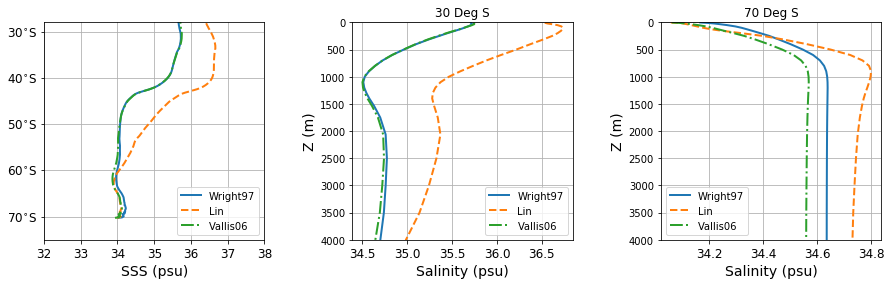

In [32]:
grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.3)
fig = plt.figure(figsize=[15,4])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds['so'].sel(xh = slice(0,80)).isel(time=0, z_l=0).mean('xh'),ds['yh'],lw=2,label='Wright97')
ax.plot(S_lin.sel(xh = slice(0,80)).isel(time=0, z_l=0).mean('xh'),ds['yh'],lw=2, ls='--',label='Lin')
ax.plot(S_nonlin.sel(xh = slice(0,80)).isel(time=0, z_l=0).mean('xh'),ds['yh'],lw=2, ls='-.',label='Vallis06')
ax.set_xlabel('SSS (psu)',fontsize=14)
plt.yticks([-70, -60, -50, -40, -30], 
           ['70$^{\circ}$S', '60$^{\circ}$S', '50$^{\circ}$S', '40$^{\circ}$S', '30$^{\circ}$S'],fontsize=12)
ax.set_ylim([-75,-28])
ax.set_xlim((32.,38.))
ax.legend(loc='lower right')
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[0, 1])
ax.plot(ds['so'].sel(xh = slice(0,80), yh = slice(-31.0, -29.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2,label='Wright97')
ax.plot(S_lin.sel(xh = slice(0,80), yh = slice(-31.0, -29.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2,ls='--',label='Lin')
ax.plot(S_nonlin.sel(xh = slice(0,80), yh = slice(-31.0, -29.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2,ls='-.',label='Vallis06')
ax.set_xlabel('Salinity (psu)',fontsize=14)
ax.set_ylim([0.,4000.])
ax.set_title('30 Deg S')
ax.set_ylabel('Z (m)',fontsize=14)
ax.legend(loc='lower right')
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.grid()

ax = fig.add_subplot(grid[0, 2])
ax.plot(ds['so'].sel(xh = slice(0,80), yh = slice(-71.0, -69.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2,label='Wright97')
ax.plot(S_lin.sel(xh = slice(0,80), yh = slice(-71.0, -69.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2,ls='--',label='Lin')
ax.plot(S_nonlin.sel(xh = slice(0,80), yh = slice(-71.0, -69.0)).isel(time=0).mean(['xh','yh']),ds['z_l'],lw=2,ls='-.',label='Vallis06')
ax.set_xlabel('Salinity (psu)',fontsize=14)
ax.set_title('70 Deg S')
ax.set_ylim([0.,4000.])
ax.set_ylabel('Z (m)',fontsize=14)
ax.legend(loc='lower left')
ax.invert_yaxis()
plt.xticks(fontsize=12)
plt.grid()

In [33]:
ds.close()